In [17]:
from TrafficGraph import TrafficGraph
from utils import *
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import time
from pympler import asizeof
import copy

%matplotlib inline
mpl.rcParams['figure.figsize'] = (10, 6)


# Load Data

In [18]:
days = ["Monday", "Wednesday", "Thursday", "Sunday"]
times = {"o1": [], "r1": [], "o2": [], "r2": []}
graphs = {}
for day in days:
    graphs[day] = copy.deepcopy(times)
for day in days:
    for file in list_files(day):
        graphpath = graph_path(file)
        g = TrafficGraph(graphpath=graphpath)
        graphs[day][g.data_category].append(g)

# Plot jam factor against velocity proportion

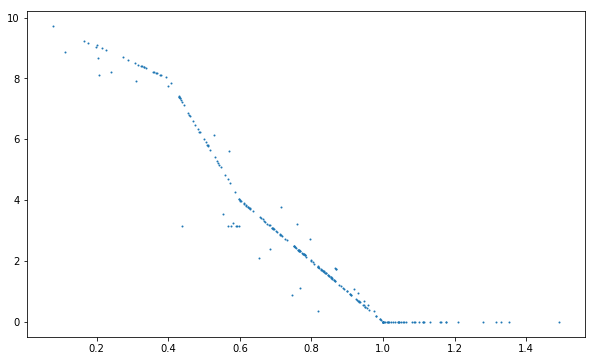

In [17]:
vvmax = []
jam_factor = []

for file in list_files():
    data = load_data(file)
    vvmax.extend(data["actual_speed"]/data["freeflow_speed"])
    jam_factor.extend(data["jam_factor"])

paired_data = np.array([vvmax, jam_factor]).T
np.random.shuffle(paired_data)
fig1 = plt.figure()
ax1 = fig1.add_subplot(1,1,1)
ax1.scatter(paired_data[0:250,0], paired_data[0:250,1], s = 1)
plt.show()

# Plot network health

In [6]:
monday_graphs = {"o1": [], "r1": [], "o2": [], "r2": []}
for tr in range(0,4):
    for file in list_files("Monday", tr):
        graphpath = graph_path(file)
        if os.path.exists(graphpath):
            g = TrafficGraph(graphpath=graphpath)
            monday_graphs[g.data_category].append(g)

In [7]:
monday_times = {"o1": [], "r1": [], "o2": [], "r2": []}
monday_healths = {"o1": [], "r1": [], "o2": [], "r2": []}
for key in monday_graphs:
    for g in monday_graphs[key]:
        total_ffvelocity_length = 0
        total_velocity_length = 0
        monday_times[key].append(g.timestamp)
        for e in g.edges():
            total_ffvelocity_length = total_ffvelocity_length + g.freeflow_speed[e]*g.length[e]
            total_velocity_length = total_velocity_length + g.actual_speed[e]*g.length[e]
        monday_healths[key].append(total_velocity_length/total_ffvelocity_length)

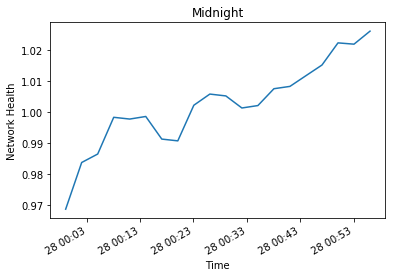

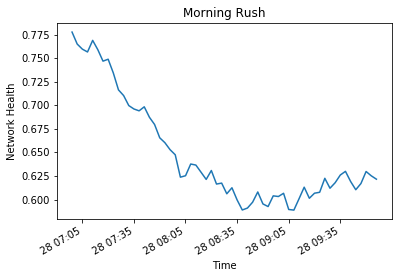

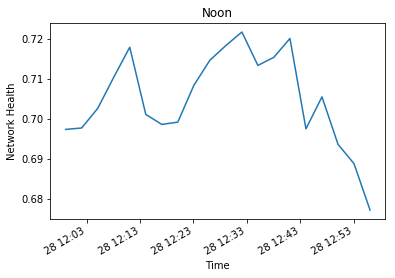

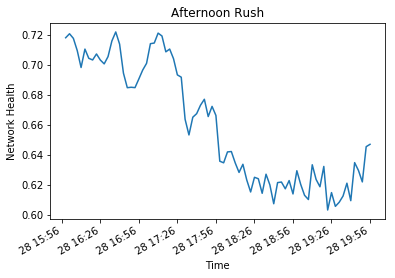

In [13]:
titles = {"o1": "Midnight", "r1": "Morning Rush", "o2": "Noon", "r2": "Afternoon Rush"}
for key in monday_graphs:
    fig, ax = plt.subplots()
    times = monday_times[key]
    healths = monday_healths[key]
    ax.plot(times, healths)
    ax.set_xlabel("Time")
    ax.set_ylabel("Network Health")
    ax.set_title(titles[key])
    #ax.set_ylim(0, 1.2)
    fig.autofmt_xdate()

# Test max flow (fundamental equation)